## Import module

In [1]:
import pandas as pd
import numpy as np
import os
# import path
import matplotlib.pyplot as plt
import seaborn as sns
import random 
import time 
import math
import scipy
import datetime
import re


## Loading datasets

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# delete a column
df = df.drop(columns=["Id"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# data type information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
# check null values 
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
# na values

df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Exploratory Data Analysis

<AxesSubplot:>

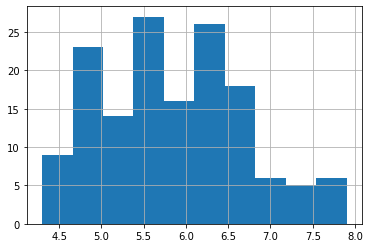

In [10]:
df.SepalLengthCm.hist()

<AxesSubplot:>

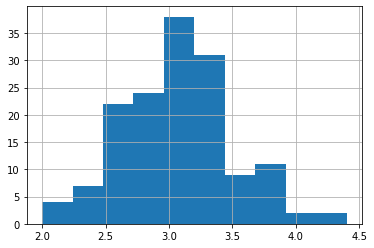

In [11]:
df.SepalWidthCm.hist()

<AxesSubplot:>

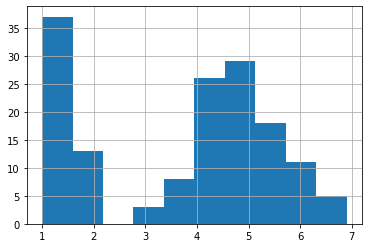

In [12]:
df.PetalLengthCm.hist()

<AxesSubplot:>

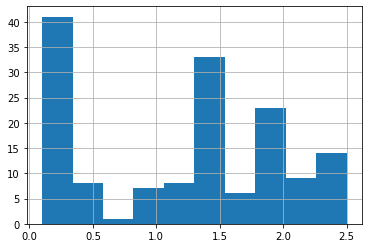

In [13]:
df.PetalWidthCm.hist()

### Scatter Plot

In [14]:
species = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
colors = ['red', 'orange', 'blue']

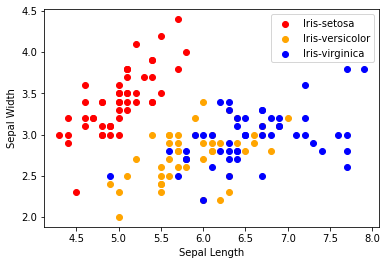

In [15]:
# Sepal width and length

for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c= colors[i], label=species[i])
    
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

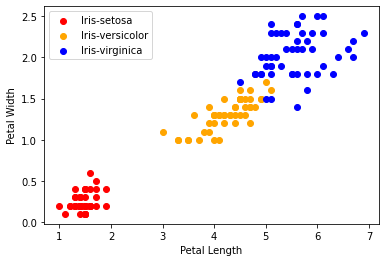

In [16]:
# Petal width and length

for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c= colors[i], label=species[i])
    
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

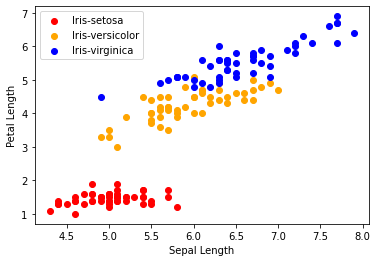

In [17]:
# Sepal length vs petal length 

for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c= colors[i], label=species[i])
    
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()


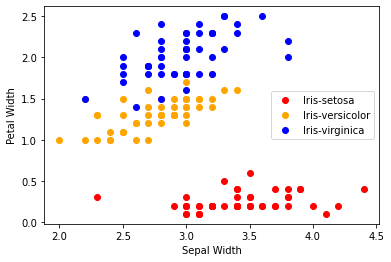

In [18]:
# Sepal vs petal width

for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c= colors[i], label=species[i])
    
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

## Correlation Matrix

A correlation matrix is a table showing correlation coeeficients between variales. Each cell in the table shows the corerelation between twp variables. The value is in the range of -1 to 1. If two variables have high correlation, we can neglect one variable from those two.

In [19]:
colors = ['red','green']
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

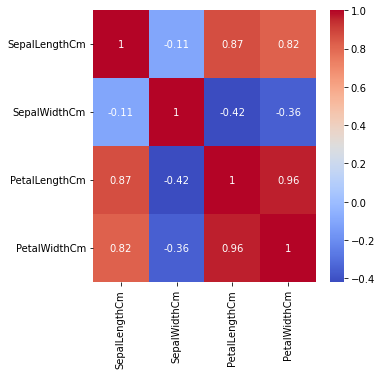

In [20]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')

    - Columns with +1 have highest correlation
    - Columns with -1 have lowest correlation
    - values near 0 show little correlation

## Label Encoder

    Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form.Machine learning algorithms can then decide in a better way how those labels must be operated.It is an important pre-processing step for the structured dataset in supervised learning.
    
https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
# converal Specie column to a number (0 , 1 and 2)

df['Species'] = le.fit_transform(df['Species'])

In [23]:
# Looking at first 5 rows and all columns

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
df.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

## Model Training

In [25]:
from sklearn.model_selection import train_test_split
import random

random.seed(123)

X = df.drop(columns=['Species'])
Y = df.Species

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [26]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [27]:
# Model training

lr.fit(X_train, y_train)

LogisticRegression()

In [28]:
print("Accuracy: ", lr.score(X_test, y_test)*100)

Accuracy:  97.77777777777777


In [29]:
# K-nearst Neighbor knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [30]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
print("Accuracy: ", knn.score(X_test, y_test)*100)

Accuracy:  97.77777777777777


C:\Users\benjk\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [32]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier()

In [33]:
# fit the model
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
print("Accuracy of Model: ", dt.score(X_test, y_test)*100)

Accuracy of Model:  97.77777777777777


In [35]:
# XGBoost
# library for classification
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

C:\Users\benjk\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [36]:
xgb = XGBClassifier(learning_rate =0.1,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=2,
                    gamma=0,
                    subsample=0.5,
                    colsample_bytree=0.6,
                    scale_pos_weight=1)

In [37]:
model = xgb.fit(X_train, y_train)

fits = xgb.predict(X_train)

predscek = xgb.predict(X_test)

acc_xgbfits = (fits == y_train).sum().astype(float) / len(fits)*100
acc_xgbcek = (predscek == y_test).sum().astype(float) / len(predscek)*100

print("XGBoost's prediction accuracy for training data is: %3.2f" % (acc_xgbfits))
print("XGBoost's prediction accuracy for testing data in sample is: %3.2f" % (acc_xgbcek))

preds = xgb.predict(X_test)

[11:41:50] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:41:50] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\benjk\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\benjk\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBoost's prediction accuracy for training data is: 99.05
XGBoost's prediction accuracy for testing data in sample is: 95.56


In [38]:
from sklearn.metrics import recall_score

for clf in (lr, knn, dt, xgb):
    y_pred = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, recall_score(y_test, y_pred, pos_label='positive', average='micro'))

LogisticRegression 0.9777777777777777
KNeighborsClassifier 0.9777777777777777
DecisionTreeClassifier 0.9777777777777777
[11:41:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:41:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\benjk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\benjk\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\benjk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'mic

XGBClassifier 0.9555555555555556


C:\Users\benjk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
